## magnetic field scan 4 rings

In [3]:
import numpy as np
from mpl_toolkits.mplot3d import axes3d 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib notebook

The magnetic field as funtion of x,y and z position was measured of magnet ring 1,2,3,4 mounted on a 5cm pitch spacing. A setup was prepared that can automatically perform a scan in the x-y plane. The height z has to be manually adjusted prior to a new scan by changing the distance between the magnet ring and the table.

![](4ringen.jpg)

The picture shows the orientation of the x-y-z axes in red, and the Bx,By and Bz axes of the probe are in green. The ring was mounted with the magnetic field lines pointing up.

A total of 5 x-y planes have been measured at z positions -60mm, -40mm, -20mm and 0mm. The x range was set to [-290,100]mm with steps of 10mm. The y range was set to [-100,100]mm with steps of 50mm. A new log file was created for each z value.

The meaning in the columns in the log files are: z, y, x, Bx, By, Bz, |B|

In [18]:
# creating plots for constant z value
filename = 'MRI_4ring_scan_z=0.txt'
f = open(filename)
tekst = f.read()
f.close()
zscan = []
tekst = tekst.split('\n')
for sample in tekst[:-1]:
    sample = sample.split('\t')
    sample = [float(i) for i in sample]
    zscan.append(sample)

xpts = [val[2] for val in zscan] # x positions
ypts = [val[1] for val in zscan] # y positions
Bxpts = [val[3] for val in zscan] # B in vertical direction
Bypts = [val[4] for val in zscan] # B in horizontal direction
Bzpts = [val[5] for val in zscan] # B in probe direction
Bdpts = [val[3]+val[6] for val in zscan] # defference between Bx and |B|

<IPython.core.display.Javascript object>


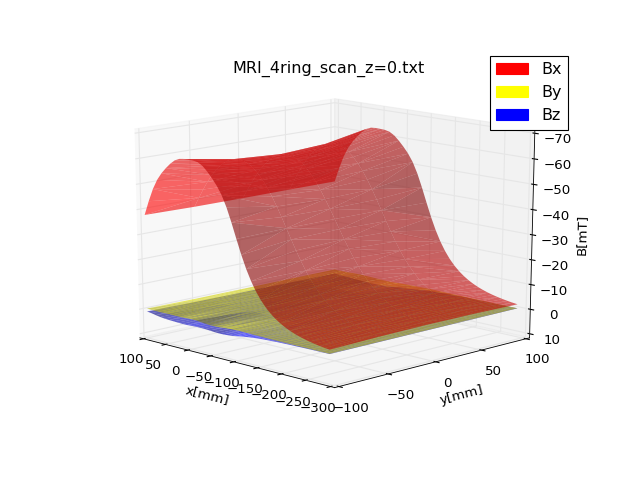

In [19]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1,projection = '3d')
ax1.plot_trisurf(xpts,ypts,Bxpts, alpha=0.6, color='red', edgecolor='none')
ax1.plot_trisurf(xpts,ypts,Bypts, alpha=0.6, color='yellow', edgecolor='none')
ax1.plot_trisurf(xpts,ypts,Bzpts, alpha=0.6, color='blue', edgecolor='none')
#ax1.plot_trisurf(xpts,ypts,Bdpts, alpha=0.6, color='gray', edgecolor='none')
ax1.view_init(elev=-165, azim=45)
plt.title(filename )
plt.xlabel('x[mm]')
plt.ylabel('y[mm]')
ax1.set_zlabel('B[mT]')
x_patch = mpatches.Patch(color='red', label='Bx')
y_patch = mpatches.Patch(color='yellow', label='By')
z_patch = mpatches.Patch(color='blue', label='Bz')
plt.legend(handles=[x_patch, y_patch, z_patch])
ax1.yaxis.set_ticks([-100,-50,0,50,100])
plt.show()

Next: constant x value plots

In [13]:
files = ['MRI_4ring_scan_z=0.txt','MRI_4ring_scan_z=-20.txt','MRI_4ring_scan_z=-40.txt','MRI_4ring_scan_z=-60.txt']
x = 0 # x position in mm
xscan = []
for file in files:
    f = open(file)
    tekst = f.read()
    f.close()
    tekst = tekst.split('\n')
    for sample in tekst[:-1]:
        sample = sample.split('\t')
        sample = [float(i) for i in sample]        
        if(sample[2] == x):
            xscan.append(sample)
            if(sample[0] != 0):                
                copy = sample[:]
                copy[0] = copy[0] * -1
                xscan.append(copy)
            
zpt = [val[0] for val in xscan] # x positions
ypt = [val[1] for val in xscan] # y positions
Bmpt = [val[6] for val in xscan] # B modulus
# note: the z data is mirrored over z=0, so use only the modulus here

<IPython.core.display.Javascript object>


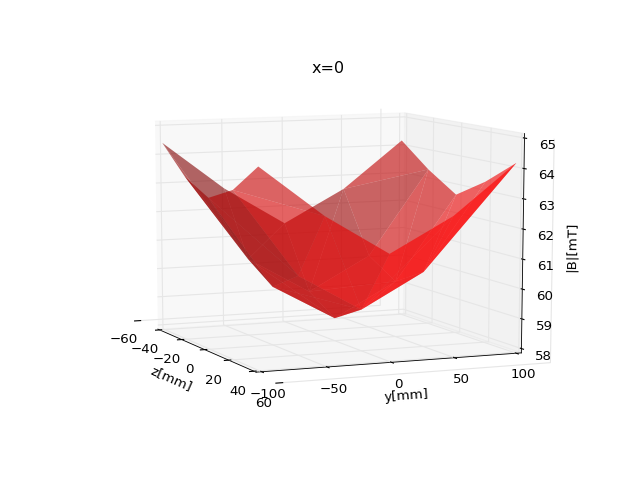

In [12]:
fig = plt.figure()
ax2 = fig.add_subplot(1,1,1,projection = '3d')
ax2.plot_trisurf(zpt,ypt,Bmpt, alpha=0.6, color='red', edgecolor='none')
ax2.view_init(elev=11, azim=-27)
plt.title('x=' + str(x) )
plt.xlabel('z[mm]')
plt.ylabel('y[mm]')
ax2.set_zlabel('|B|[mT]')
ax2.yaxis.set_ticks([-100,-50,0,50,100])
ax2.xaxis.set_ticks([-60,-40,-20,0,20,40,60])
plt.show()